# Salmon vs Seabass



In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
import matplotlib.pyplot as plt
from Perceptron import Perceptron


#### Carregamento de dados
Salmon = 0 e Seabass = 1

In [2]:
data = pd.read_csv('salmon_seabass.csv')
data


,index,lightness,width,species
0,0,2.834754,21.087143,0
1,1,3.329180,18.877143,0
2,2,3.690492,19.824286,0
3,3,4.812459,17.760000,0
4,4,4.812459,16.497143,0
...,...,...,...,...
126,126,8.976774,18.656940,1
127,127,5.365806,21.308897,1
128,128,6.226452,20.203915,1
129,129,8.789677,16.054093,1


Separar entradas somente com as colunas lightness e width e saida com species


In [3]:
X = data.drop(columns=['species','index']).values
y = data['species'].values

#### Nomalizacao de dados
Etapa de separacao de 70% treino e 30% teste.

In [4]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Treinamento

In [5]:
#treinamento do modelo
perceptron = Perceptron(0.001, 5000)
perceptron.fit(X_train, y_train)

#### Teste e avalicao de metricas como acuracia, precisao, recall, f1-score e matriz de confusao

In [6]:
# Fazer o teste do modelo
y_pred_test = perceptron.predict(X_test)

# Avaliar a performance da Perceptron
acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)

In [7]:
# Exibir os resultados
print(f"Acurácia: {acc * 100:.2f}%")
print(f"Precisão (Precision): {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"Matriz de Confusão:\n{conf_matrix}")




Acurácia: 92.50%
Precisão (Precision): 100.00%
Recall: 80.00%
F1-score: 88.89%
Matriz de Confusão:
[[25  0]
 [ 3 12]]


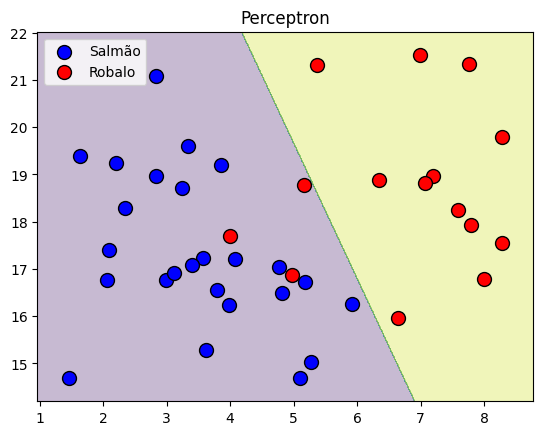

In [8]:
# EXTRA: Visualizar a superfície de decisão

# Reverter a normalização dos dados de teste para obter os valores originais
X_test_original = scaler.inverse_transform(X_test)

# Função para plotar a superfície de decisão
def plot_decision(X, y, model):
        # Determina os limites para as dimensões dos dados
        x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  
        x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 
        
        # Para desenhar a superfície de decisão, cria uma grade de pontos que cobre toda a área de interesse.
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),  
                                np.arange(x2_min, x2_max, 0.01))  

        # Após criar a grade, o modelo Perceptron prevê a classe de cada ponto na grade.
        grid = np.c_[xx1.ravel(), xx2.ravel()] 

        # Escala os dados da grade usando o mesmo scaler utilizado para os dados de treinamento
        grid_scaled = scaler.transform(grid) 
        Z = model.predict(grid_scaled)  
        Z = Z.reshape(xx1.shape)  
        
        # Plota a superfície de decisão como um contorno preenchido
        plt.contourf(xx1, xx2, Z, alpha=0.3)
        
        # Plota os dados de teste, colorindo os pontos de acordo com suas classes
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 
                        color='blue', edgecolors='k', marker='o', s=100, label='Salmão')  # Pontos da classe Salmão
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
                        color='red', edgecolors='k', marker='o', s=100, label='Robalo')  # Pontos da classe Robalo
        
        plt.legend() 
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title('Perceptron')
        plt.show()

# Plotar a superfície de decisão chamando a função plot_decision
plot_decision(X_test_original, y_test, perceptron)
